# Rotation of tectonic plates

In this exercise, we are interested in the numerical approximation of the gravity of an extended body. The gravitational potential at a point $P$ external to that body is given by Eq. (3.13),

\begin{equation}
U_g = -G\, \int_x \int_y \int_z \frac{\rho(x,y,z)}{r(x,y,z)}\,dx\,dy\,dz\,,
\end{equation}

where $G$ is the gravitational constant, $\rho(x,y,z)$ is the density at some location $(x,y,z)$, and $r(x,y,z)$ is the distance between $(x,y,z)$ and the observation point $P$.

To numerically solve the integral, we discretize the spatial domain into evenly-spaced grid points $(x_i, y_i, z_i)$, separated by some small distance $h$. We then obtain an approximation of $U_g$ by summing over all grid points,

\begin{equation}
U_g \approx -G\,\sum_i \frac{\rho(x_i,y_i,z_i)}{r(x_i,y_i,z_i)}\,V\,,
\end{equation}

where the small volume $V$ is given by $V=h^3\approx dx\,dy\,dz$.

## 0. Import Python packages and define constant

First, we import some essential Python packages, e.g., for plotting in 3D.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Plotting a spherical coordinate system

**Before we actually get started, we program a little helper function that plots a spherical coordinate system** in the form of circles at constant latitudes and longitudes. This function does not really add anything to the physics of this problem, but it will turn out to be useful for plotting purposes.

In [2]:
def plot_sphere():
    """
    Plot latitudes and longitudes of a unit sphere (radius 1) in increments of 10°.
    """

    # Pre-compute 10 degrees for later reuse.
    d=np.pi*10.0/180.0

    # Colatitude (theta) and longitude (phi) coordinate lines.
    theta=np.arange(0.0,19.0*d,d)
    phi=np.arange(0.0,37.0*d,d)

    # Plot lines of constant colatitude.
    for i in range(len(theta)):
        x=np.cos(phi)*np.sin(theta[i])
        y=np.sin(phi)*np.sin(theta[i])
        z=np.cos(theta[i])
        ax.plot(x,y,z,color=(0.7,0.7,0.7),linewidth=0.5)
    
    # Plot lines of constant longitude.
    for i in range(len(phi)):
        x=np.cos(phi[i])*np.sin(theta)
        y=np.sin(phi[i])*np.sin(theta)
        z=np.cos(theta)
        ax.plot(x,y,z,color=(0.7,0.7,0.7),linewidth=0.5)

    # Make the panes transparent.
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # Make the grid lines transparent.
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    # Arrange and label axes.
    ax.set_aspect('equal', 'box')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

## 2. Plotting a tectonic plate

**We illustrate the use of the *plot_sphere* function by plotting a simply-shaped tectonic plate**, defined by its extent in latitude and longitude.

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

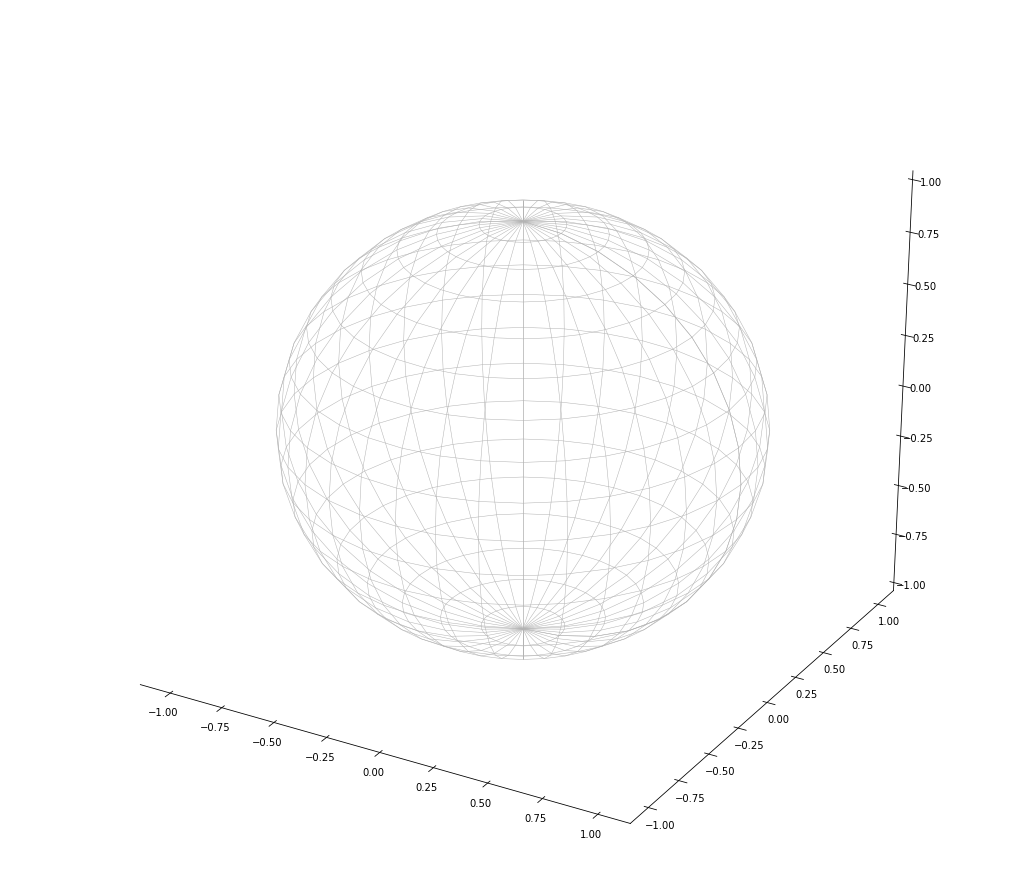

In [3]:
# Latitude and longitude ranges of the tectonic plate.
lat_min=-10.0
lat_max=30.0
lon_min=-50.0
lon_max=-20.0

# Initiate a new figure.
fig=plt.figure(figsize=(18, 16))
ax=fig.gca(projection='3d')

# Plot the spherical coordinate system.
plot_sphere()
    
# Compute longitude and colatitude points of the tectonic plate on the unit sphere.
phi=np.linspace(lon_min*np.pi/180.0,lon_max*np.pi/180.0,40)
theta=np.linspace((90.0-lat_max)*np.pi/180.0,(90.0-lat_min)*np.pi/180.0,20)

# Compute the corresponding Cartesian x, y, and z coordinates.
x=np.outer(np.cos(phi), np.sin(theta))
y=np.outer(np.sin(phi), np.sin(theta))
z=np.outer(np.ones(np.size(phi)), np.cos(theta))

# Plot the plate.
ax.plot_surface(x, y, z, color='b')
plt.show()

## 3. Rotating the plate around the $x$-axis

**We continue with the easiest form of rotation, namely the rotation around the $x$-axis.** This corresponds to an Euler pole location at $0^\circ$ latitude ($90^\circ$ colatitude) and $0^\circ$ longitude. Denoting the rotation angle by $\alpha$, the rotation around the $x$-axis changes the original coordinates of a point at the surface, $(x, y, z)$, into the new coordinates

\begin{align}
x_\text{rot} & = x\,,\\
y_\text{rot} & = y\,\cos\alpha - z\,\sin\alpha\,,\\
z_\text{rot} & = y\,\sin\alpha + z\,\cos\alpha\,.
\end{align}

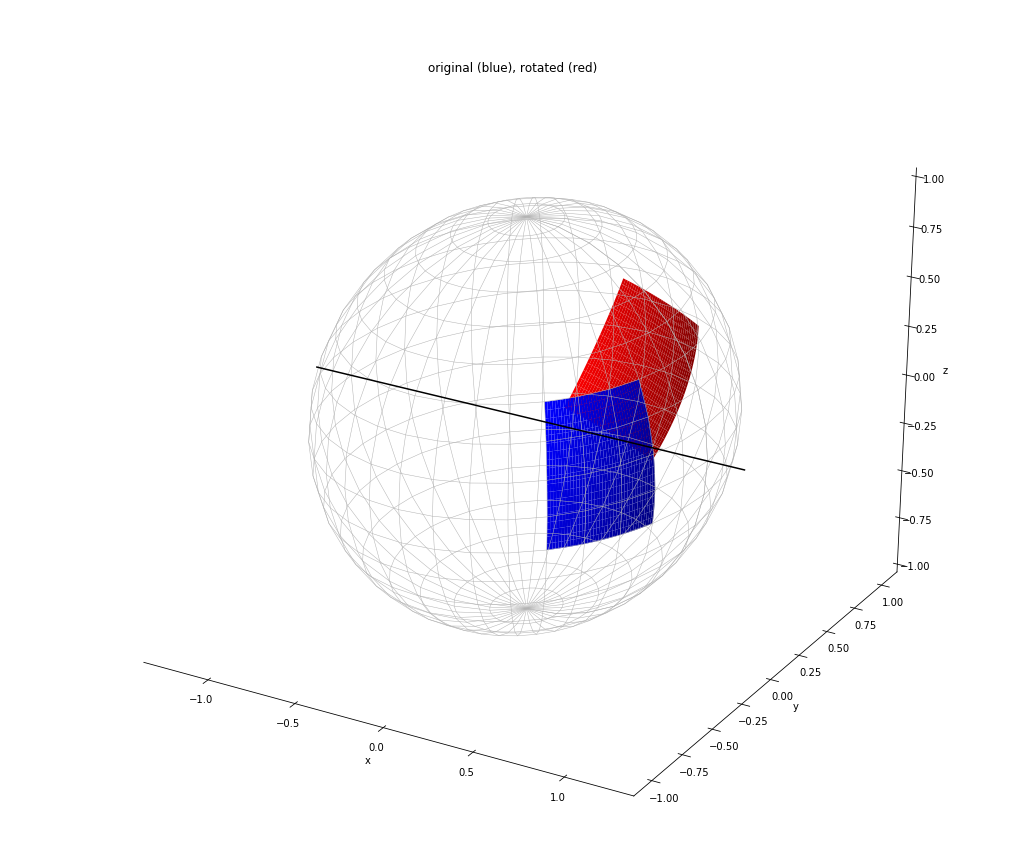

In [15]:
# Initialize the rotated coordinates of points within the plate.
x_rot=np.zeros(np.shape(x))
y_rot=np.zeros(np.shape(y))
z_rot=np.zeros(np.shape(z))

# Choose a rotation angle.
alpha=-50.0*np.pi/180.0

# Rotate the points within the original plate.
for i in range(len(phi)):
    for j in range(len(theta)):
        
        x_rot[i,j]=x[i,j]
        y_rot[i,j]=np.cos(alpha)*y[i,j]-np.sin(alpha)*z[i,j]
        z_rot[i,j]=np.sin(alpha)*y[i,j]+np.cos(alpha)*z[i,j]

# Plot the spherical coordinate system.       
fig=plt.figure(figsize=(18, 16))
ax=fig.gca(projection='3d')
plot_sphere()

# Plot the x-axis for visual orientation.
ax.plot((-1.2,1.2),(0.0,0.0),(0.0,0.0),'k',linewidth=1.5)

# Plot the original and rotated positions of the plate.
ax.plot_surface(x, y, z, color='b')
ax.plot_surface(x_rot, y_rot, z_rot, color='r')
plt.title('original (blue), rotated (red)')
plt.show()

## 4. Rotation around an arbitrarily oriented axis

**A point at the surface of a sphere may be rotated around some arbitrary axis.** We represent this axis by a unit vector $\mathbf{a}=(a_1, a_2, a_3)$, i.e., a vector of length $1$. Again denoting the rotation angle by $\alpha$, the rotation around the $\mathbf{a}$-axis changes the original coordinates of a point at the surface, $(x, y, z)$, into the new coordinates

\begin{align}
x_\text{rot} & = \left[ \cos\alpha + (1-\cos\alpha) a_1^2 \right]\,x + \left[ (1-\cos\alpha) a_1 a_2 - a_3 \sin\alpha \right]\,y + \left[ (1-\cos\alpha) a_1 a_3 + a_2\sin\alpha \right]\,z\,,\\
y_\text{rot} & = \left[ (1-\cos\alpha) a_1 a_2 + a_3 \sin\alpha \right]\,x + \left[ \cos\alpha + (1-\cos\alpha) a_2^2 \right]\,y + \left[ (1-\cos\alpha) a_2 a_3 - a_1\sin\alpha \right]\,z\,,\\
z_\text{rot} & = \left[ (1-\cos\alpha) a_1 a_3 - a_2 \sin\alpha \right]\,x + \left[ (1-\cos\alpha) a_2 a_3 + a_1 \sin\alpha \right]\,y + \left[ \cos\alpha + (1-\cos\alpha) a_3^2 \right]\,z\,.\\
\end{align}

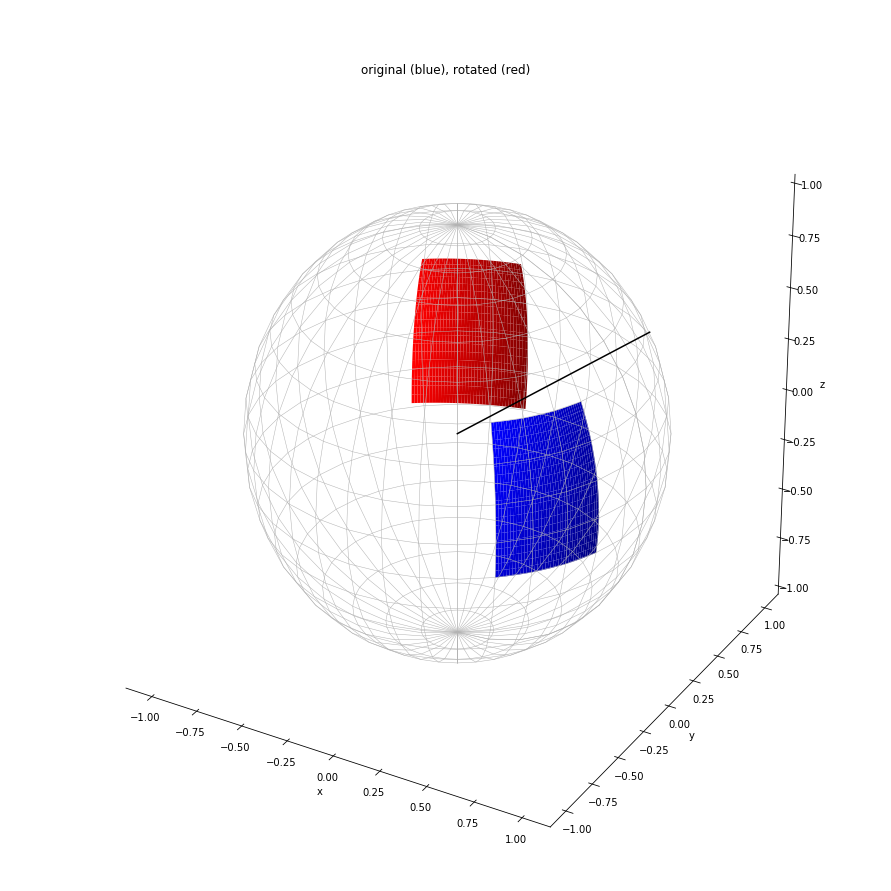

In [16]:
# Initialize the rotated coordinates of points within the plate.
x_rot=np.zeros(np.shape(x))
y_rot=np.zeros(np.shape(y))
z_rot=np.zeros(np.shape(z))

# Choose a rotation angle.
alpha=-50.0*np.pi/180.0

# Choose a rotation axis.
a_1=0.5
a_2=0.4
a_3=0.3

# Ensure that length of rotation axis is $1$.
l=np.sqrt(a_1**2+a_2**2+a_3**2)
a_1=a_1/l
a_2=a_2/l
a_3=a_3/l

# Precompute factors in the rotation equation.
rxx=np.cos(alpha) + (1.0-np.cos(alpha))*a_1**2
rxy=(1.0-np.cos(alpha))*a_1*a_2 - a_3*np.sin(alpha)
rxz=(1.0-np.cos(alpha))*a_1*a_3 + a_2*np.sin(alpha)
ryx=(1.0-np.cos(alpha))*a_1*a_2 + a_3*np.sin(alpha)
ryy=np.cos(alpha) + (1.0-np.cos(alpha))*a_2**2
ryz=(1.0-np.cos(alpha))*a_2*a_3 - a_1*np.sin(alpha)
rzx=(1.0-np.cos(alpha))*a_1*a_3 - a_2*np.sin(alpha)
rzy=(1.0-np.cos(alpha))*a_2*a_3 + a_1*np.sin(alpha)
rzz=np.cos(alpha) + (1.0-np.cos(alpha))*a_3**2

# Rotate the points within the original plate.
for i in range(len(phi)):
    for j in range(len(theta)):
        
        x_rot[i,j]=rxx*x[i,j]+rxy*y[i,j]+rxz*z[i,j]
        y_rot[i,j]=ryx*x[i,j]+ryy*y[i,j]+ryz*z[i,j]
        z_rot[i,j]=rzx*x[i,j]+rzy*y[i,j]+rzz*z[i,j]

# Plot the spherical coordinate system.       
fig=plt.figure(figsize=(18, 16))
ax=fig.gca(projection='3d')
plot_sphere()

# Plot the x-axis for visual orientation.
ax.plot((0.0,a_1),(0.0,a_2),(0.0,a_3),'k',linewidth=1.5)

# Plot the original and rotated positions of the plate.
ax.plot_surface(x, y, z, color='b')
ax.plot_surface(x_rot, y_rot, z_rot, color='r')
plt.title('original (blue), rotated (red)')
plt.show()  

## 5. Exercises

1) What is the Euler pole location (latitude and longitude) for the rotation axis in point 4?

2) From the rotation equations under point 4, deduce the special cases where the rotation axis is (a) parallel to the $y$-axis and (b) parallel to the $z$-axis.

3) Implement a second plate covering the area between *lat_min=-60.0*, *lat_max=-30.0*, *lon_min=10.0*, *lon_max=30.0*. Let the plate rotate around an Euler pole located in your hometown. After which rotation angle does it collide with the original plate (if it collides at all)?